# Objective
  * Identify the Which Variable have more impact on Price of Mobile
  * To build the Model which will help to Predict the Price of model 
  

In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"mobile_prices_2023.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [3]:
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


# EDA

#### missing value

In [4]:
df.isna().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isna().sum() 


Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1291 non-null   object 
 1   Rating ?/5         1291 non-null   float64
 2   Number of Ratings  1291 non-null   object 
 3   RAM                1291 non-null   object 
 4   ROM/Storage        1291 non-null   object 
 5   Back/Rare Camera   1291 non-null   object 
 6   Front Camera       1291 non-null   object 
 7   Battery            1291 non-null   object 
 8   Processor          1291 non-null   object 
 9   Price in INR       1291 non-null   object 
 10  Date of Scraping   1291 non-null   object 
dtypes: float64(1), object(10)
memory usage: 121.0+ KB


#### remove unwanted string

In [8]:
def extract_first_number(text):
    if isinstance(text, str):  
        match = re.search(r'\d+', text)  
        return match.group(0) if match else None  
    return None  


df['Back/Rare Camera'] = df['Back/Rare Camera'].apply(extract_first_number)

columns_to_clean = ['RAM', 'ROM/Storage', 'Front Camera','Battery']  

for column in columns_to_clean:
    df[column] = df[column].apply(extract_first_number)



In [9]:
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2,32,8,5,5000,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4,64,50,8,5000,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4,64,8,5,5000,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4,64,50,5,5000,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4,64,8,5,5000,Helio G36 Processor,"₹6,999",2023-06-17


In [10]:
df = df.drop(columns = {"Phone Name","Processor","Date of Scraping"})

In [11]:
new_column_names = ['Rating', 'Num_of_rating', 'RAM','ROM','BACK_camera','Front_camera','Battery','Price']

df.columns = new_column_names

#### drop column

In [12]:

df['Price'] = df['Price'].str.replace('₹', '', regex=False)

In [13]:
df['Num_of_rating'] = df['Num_of_rating'].str.replace(',', '').astype(int)
df['Price'] = df['Price'].str.replace(',', '').astype(int)

In [14]:
df.head()

,Rating,Num_of_rating,RAM,ROM,BACK_camera,Front_camera,Battery,Price
0,4.2,33561,2,32,8,5,5000,5649
1,4.2,77128,4,64,50,8,5000,11999
2,4.3,15175,4,64,8,5,5000,6999
3,4.2,22621,4,64,50,5,5000,7749
4,4.3,15175,4,64,8,5,5000,6999


In [15]:

columns = ["RAM",'ROM','BACK_camera','Front_camera','Battery']
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
df = df.dropna()


# outlier

<AxesSubplot:>

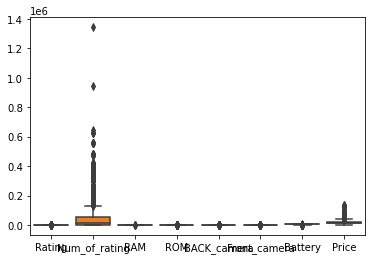

In [16]:
import seaborn as sns
sns.boxplot(data=df)


# Treatment of Outlier -- Winsorizing Technique

In [17]:
for i in df:                  
    if df[i].dtypes in ("float64","int64"): 
        q1 = df[i].quantile(0.25)  
        q3 = df[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<AxesSubplot:>

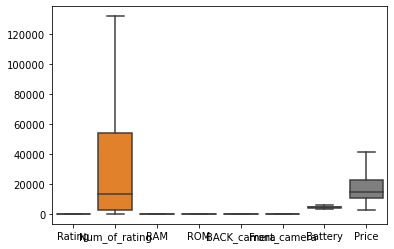

In [18]:
import seaborn as sns
sns.boxplot(data=df)


# Data Partition

In [19]:
X = df.drop('Price', axis= 1)
y = df[['Price']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 ,random_state=134)

In [20]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,Price,Rating,Num_of_rating,RAM,ROM,BACK_camera,Front_camera,Battery
223,14999.0,4.3,11117.0,8.0,224.0,64.0,28.0,4200.0
976,14999.0,4.3,1367.0,4.0,128.0,50.0,8.0,5000.0
1196,14999.0,4.3,18759.0,3.0,32.0,16.0,5.0,4850.0
969,27990.0,4.3,17455.0,8.0,128.0,64.0,28.0,4000.0
253,24999.0,4.3,62922.0,8.0,224.0,64.0,28.0,4300.0


# Correlation

In [21]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Price,Rating,Num_of_rating,RAM,ROM,BACK_camera,Front_camera,Battery
Price,1.000000,0.134432,-0.360725,0.746990,0.717379,0.471809,0.676755,-0.243065
Rating,0.134432,1.000000,0.286800,0.037869,0.106890,-0.023429,0.121234,-0.040216
Num_of_rating,-0.360725,0.286800,1.000000,-0.355982,-0.334471,-0.212715,-0.177742,0.064410
RAM,0.746990,0.037869,-0.355982,1.000000,0.830497,0.616377,0.673066,-0.009960
ROM,0.717379,0.106890,-0.334471,0.830497,1.000000,0.603260,0.618534,0.054900
BACK_camera,0.471809,-0.023429,-0.212715,0.616377,0.603260,1.000000,0.556474,0.202213
Front_camera,0.676755,0.121234,-0.177742,0.673066,0.618534,0.556474,1.000000,-0.141864
Battery,-0.243065,-0.040216,0.064410,-0.009960,0.054900,0.202213,-0.141864,1.000000


# Correlation
* RAM and ROM have high impact on Price of Phone
* Multi-Colinearity is Present

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = df.drop(['Price'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])],index=X1.columns) 
series_before

Rating           72.524024
Num_of_rating     1.958339
RAM              20.317575
ROM              13.133041
BACK_camera       7.439532
Front_camera      8.518173
Battery          64.439168
dtype: float64

# Model Builiding

#### Method 2 -- Variable selection Method
1. Forward Selection Method
2. Backward Selection Method

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector as sfs

lreg = LinearRegression()
Model = sfs(lreg, n_features_to_select = 5, direction='forward', scoring='r2')
Model.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5,
                          scoring='r2')

In [24]:
Model.feature_names_in_

array(['Rating', 'Num_of_rating', 'RAM', 'ROM', 'BACK_camera',
       'Front_camera', 'Battery'], dtype=object)

In [25]:
Model.get_feature_names_out()

array(['Num_of_rating', 'RAM', 'ROM', 'Front_camera', 'Battery'],
      dtype=object)

#### Method 2 -- sklearn

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
X_train = X_train.loc[:,['RAM', 'ROM','Front_camera','Battery']]
X_train.head()

,RAM,ROM,Front_camera,Battery
223,8.0,224.0,28.0,4200.0
976,4.0,128.0,8.0,5000.0
1196,3.0,32.0,5.0,4850.0
969,8.0,128.0,28.0,4000.0
253,8.0,224.0,28.0,4300.0


In [28]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,RAM,ROM,Front_camera,Battery,Price
223,8.0,224.0,28.0,4200.0,14999.0
976,4.0,128.0,8.0,5000.0,14999.0
1196,3.0,32.0,5.0,4850.0,14999.0
969,8.0,128.0,28.0,4000.0,27990.0
253,8.0,224.0,28.0,4300.0,24999.0


In [29]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [30]:
np.round(Model3.intercept_,3)

array([18240.319])

In [31]:
np.round(Model3.coef_,4)

array([[1374.2112,   55.2753,  302.081 ,   -3.6302]])

In [32]:
Model3.feature_names_in_

array(['RAM', 'ROM', 'Front_camera', 'Battery'], dtype=object)

#### Model

* y = 18240.319 + 1374.2112 * RAM +   55.2753 * ROM +  302.081 * Front_camera +   -3.6302 * Battery

# Prediction on Train

In [33]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)
train['Residual'] = np.round(train.Price - train.fitted_value,2)
train.head()

,RAM,ROM,Front_camera,Battery,Price,fitted_value,Residual
223,8.0,224.0,28.0,4200.0,14999.0,34827.13,-19828.13
976,4.0,128.0,8.0,5000.0,14999.0,15078.08,-79.08
1196,3.0,32.0,5.0,4850.0,14999.0,8035.73,6963.27
969,8.0,128.0,28.0,4000.0,27990.0,30246.74,-2256.74
253,8.0,224.0,28.0,4300.0,24999.0,34464.11,-9465.11


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  68.0


# Assumption of Linear Regression 

<AxesSubplot:xlabel='RAM', ylabel='Residual'>

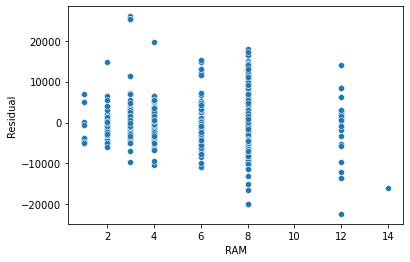

In [35]:
sns.scatterplot(x='RAM', y='Residual',data=train)

<AxesSubplot:xlabel='fitted_value', ylabel='Residual'>

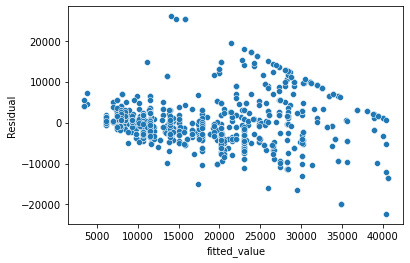

In [36]:
sns.scatterplot(x='fitted_value', y='Residual',data=train)

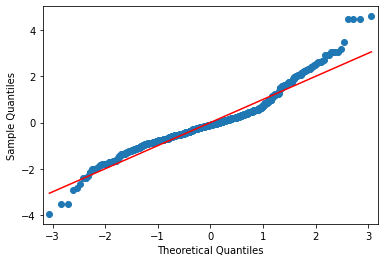

In [37]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(train['Residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<AxesSubplot:ylabel='Frequency'>

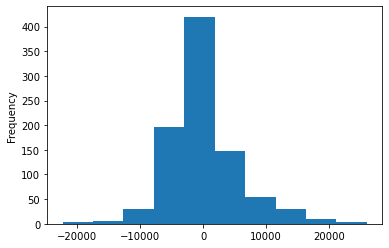

In [38]:
train['Residual'].plot.hist()

# Prediction on Test

In [39]:
X_test = X_test.loc[:,['RAM', 'ROM', 'Front_camera', 'Battery']]
X_test.head()

,RAM,ROM,Front_camera,Battery
1356,4.0,64.0,8.0,5000.0
1018,8.0,128.0,28.0,4300.0
1751,4.0,64.0,8.0,6000.0
1655,3.0,32.0,8.0,3250.0
1481,12.0,224.0,28.0,4610.0


In [40]:
test = pd.concat([X_test,y_test], axis=1)
test.head()

,RAM,ROM,Front_camera,Battery,Price
1356,4.0,64.0,8.0,5000.0,13999.0
1018,8.0,128.0,28.0,4300.0,37990.0
1751,4.0,64.0,8.0,6000.0,8999.0
1655,3.0,32.0,8.0,3250.0,39999.0
1481,12.0,224.0,28.0,4610.0,41012.5


In [41]:
import numpy as np
test['Prediction'] = np.round(Model3.predict(X_test),2)
test['Error / Residual'] = np.round(test.Price - test.Prediction,2)
test.head()

,RAM,ROM,Front_camera,Battery,Price,Prediction,Error / Residual
1356,4.0,64.0,8.0,5000.0,13999.0,11540.46,2458.54
1018,8.0,128.0,28.0,4300.0,37990.0,29157.68,8832.32
1751,4.0,64.0,8.0,6000.0,8999.0,7910.27,1088.73
1655,3.0,32.0,8.0,3250.0,39999.0,14750.28,25248.72
1481,12.0,224.0,28.0,4610.0,41012.5,38835.59,2176.91


# Comparision

In [42]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  68.0


In [43]:
r2 = r2_score(test.Price,test.Prediction)
print('R-Squared score for model Performance on Test : ', np.round(r2,2)*100)

R-Squared score for model Performance on Test :  60.0


# Loss Function -- RMSE

In [44]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['Price'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) 

RMSE of Train Data :  5644.76


In [45]:
model_mse = mean_squared_error(test['Price'],test['Prediction'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Test Data : ",np.round(model_rmse,2)) 

RMSE of Test Data :  5818.01
